In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/My Drive/DS3000_Group7_FinalProject/heart_2020_cleaned.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [6]:
boolean_columns = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'PhysicalActivity', 'Asthma',
    'KidneyDisease', 'SkinCancer'
]

boolean_mapping = {
    'Yes': 1,
    'No': 0,
}

gender_mapping = {
    'Female': 0,
    'Male': 1,
}


df[boolean_columns] = df[boolean_columns].replace(boolean_mapping)
df['Sex'] = df['Sex'].replace(gender_mapping)

df[boolean_columns] = df[boolean_columns].astype(bool)
df['Sex'] = df['Sex'].astype(int)

<ipython-input-6-5c2a7ccd921b>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[boolean_columns] = df[boolean_columns].replace(boolean_mapping)
<ipython-input-6-5c2a7ccd921b>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(gender_mapping)


In [7]:
df[boolean_columns].dtypes

,0
HeartDisease,bool
Smoking,bool
AlcoholDrinking,bool
Stroke,bool
DiffWalking,bool
PhysicalActivity,bool
Asthma,bool
KidneyDisease,bool
SkinCancer,bool


In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,16.60,True,False,False,3.0,30.0,False,0,55-59,White,Yes,True,Very good,5.0,True,False,True
1,False,20.34,False,False,True,0.0,0.0,False,0,80 or older,White,No,True,Very good,7.0,False,False,False
2,False,26.58,True,False,False,20.0,30.0,False,1,65-69,White,Yes,True,Fair,8.0,True,False,False
3,False,24.21,False,False,False,0.0,0.0,False,0,75-79,White,No,False,Good,6.0,False,False,True
4,False,23.71,False,False,False,28.0,0.0,True,0,40-44,White,No,True,Very good,8.0,False,False,False


In [9]:
df['HasDiabetes'] = 0
df['HasBorderlineDiabetes'] = 0
df['HasGestationalDiabetes'] = 0

df.loc[df['Diabetic'] == 'Yes', 'HasDiabetes'] = 1
df.loc[df['Diabetic'] == 'No, borderline diabetes', 'HasBorderlineDiabetes'] = 1
df.loc[df['Diabetic'] == 'Yes (during pregnancy)', 'HasGestationalDiabetes'] = 1

diabetic_columns = ['HasDiabetes', 'HasBorderlineDiabetes', 'HasGestationalDiabetes']
df[diabetic_columns] = df[diabetic_columns].astype(bool)

In [10]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [11]:
age_category_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}

df['AgeCategory'] = df['AgeCategory'].replace(age_category_mapping)
df['AgeCategory'] = df['AgeCategory'].astype(int)

<ipython-input-11-100ab61def78>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeCategory'] = df['AgeCategory'].replace(age_category_mapping)


In [12]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [13]:
gen_health_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

df['GenHealth'] = df['GenHealth'].replace(gen_health_mapping)
df['GenHealth'] = df['GenHealth'].astype(int)

<ipython-input-13-6cfefc1fb572>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GenHealth'] = df['GenHealth'].replace(gen_health_mapping)


In [14]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [15]:
race_dummies = pd.get_dummies(df['Race'], prefix='Race')
df = pd.concat([df, race_dummies], axis=1)
df = df.drop('Race', axis=1)

In [16]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SkinCancer,HasDiabetes,HasBorderlineDiabetes,HasGestationalDiabetes,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,False,16.60,True,False,False,3.0,30.0,False,0,8,...,True,True,False,False,False,False,False,False,False,True
1,False,20.34,False,False,True,0.0,0.0,False,0,13,...,False,False,False,False,False,False,False,False,False,True
2,False,26.58,True,False,False,20.0,30.0,False,1,10,...,False,True,False,False,False,False,False,False,False,True
3,False,24.21,False,False,False,0.0,0.0,False,0,12,...,True,False,False,False,False,False,False,False,False,True
4,False,23.71,False,False,False,28.0,0.0,True,0,5,...,False,False,False,False,False,False,False,False,False,True


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  bool   
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  bool   
 3   AlcoholDrinking                      319795 non-null  bool   
 4   Stroke                               319795 non-null  bool   
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  bool   
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  object 
 11  PhysicalActiv

In [18]:
def categorize_bmi(value):
    if value < 18.5:
        return 1
    elif 18.5 <= value < 25:
        return 2
    elif 25 <= value < 30:
        return 3
    else:
        return 4

def categorize_sleep(value):
    if value < 7:
        return 1
    elif 7 <= value <= 9:
        return 2
    else:
        return 3

df['SleepCategory'] = df['SleepTime'].apply(categorize_sleep)
df['BMI_category'] = df['BMI'].apply(categorize_bmi)

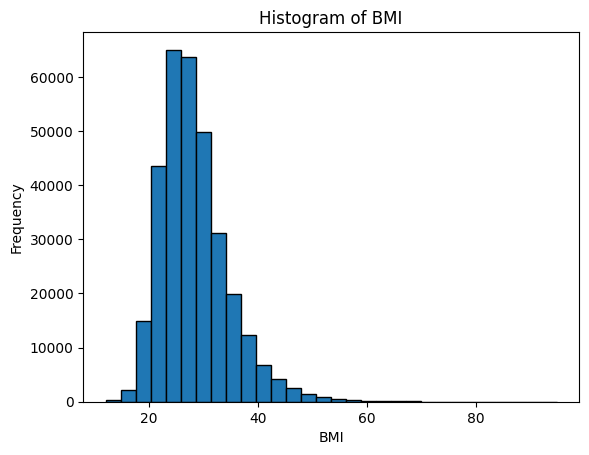

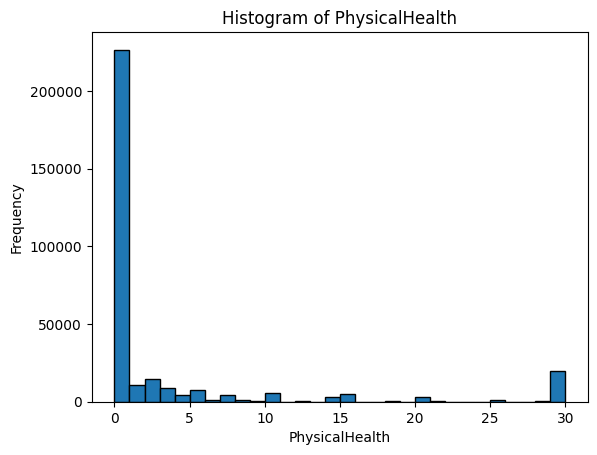

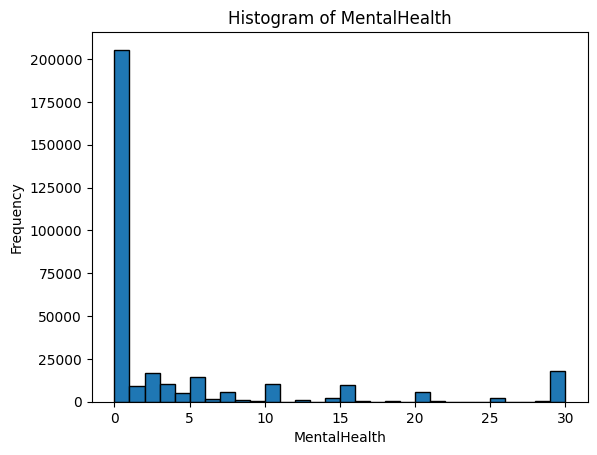

In [19]:
columns_to_plot = ['BMI', 'PhysicalHealth', 'MentalHealth']

for col in columns_to_plot:
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
scaler = StandardScaler()
df['BMI_scaled'] = scaler.fit_transform(df[['BMI']])
df['PhysicalHealth_log'] = np.log1p(df['PhysicalHealth'])
df['MentalHealth_log'] = np.log1p(df['MentalHealth'])

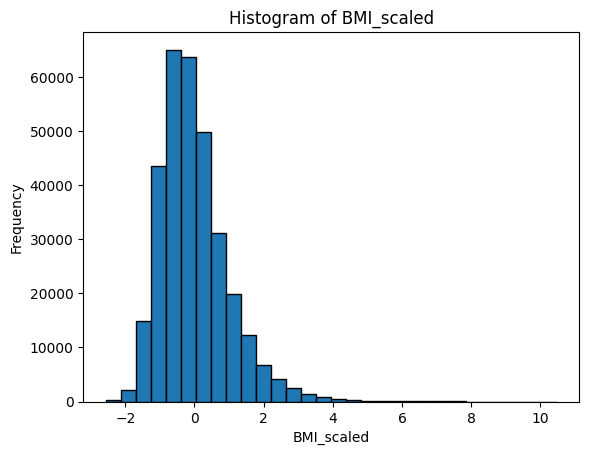

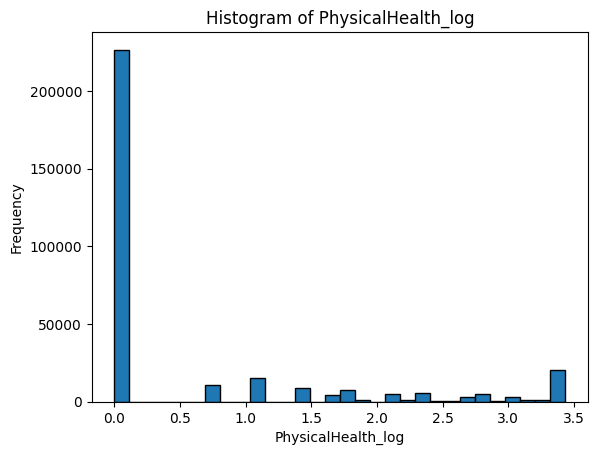

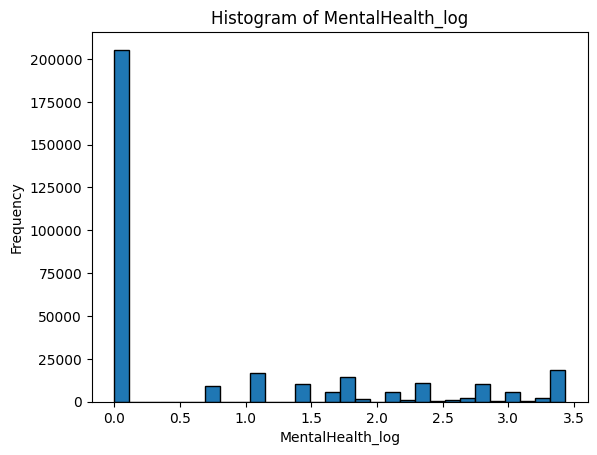

In [21]:
columns_to_plot_after_scaling = ['BMI_scaled', 'PhysicalHealth_log', 'MentalHealth_log']

for col in columns_to_plot_after_scaling:
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,SleepCategory,BMI_category,BMI_scaled,PhysicalHealth_log,MentalHealth_log
0,False,16.60,True,False,False,3.0,30.0,False,0,8,...,False,False,False,False,True,1,1,-1.844750,1.386294,3.433987
1,False,20.34,False,False,True,0.0,0.0,False,0,13,...,False,False,False,False,True,2,2,-1.256338,0.000000,0.000000
2,False,26.58,True,False,False,20.0,30.0,False,1,10,...,False,False,False,False,True,2,3,-0.274603,3.044522,3.433987
3,False,24.21,False,False,False,0.0,0.0,False,0,12,...,False,False,False,False,True,1,2,-0.647473,0.000000,0.000000
4,False,23.71,False,False,False,28.0,0.0,True,0,5,...,False,False,False,False,True,2,2,-0.726138,3.367296,0.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  bool   
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  bool   
 3   AlcoholDrinking                      319795 non-null  bool   
 4   Stroke                               319795 non-null  bool   
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  bool   
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  object 
 11  PhysicalActiv

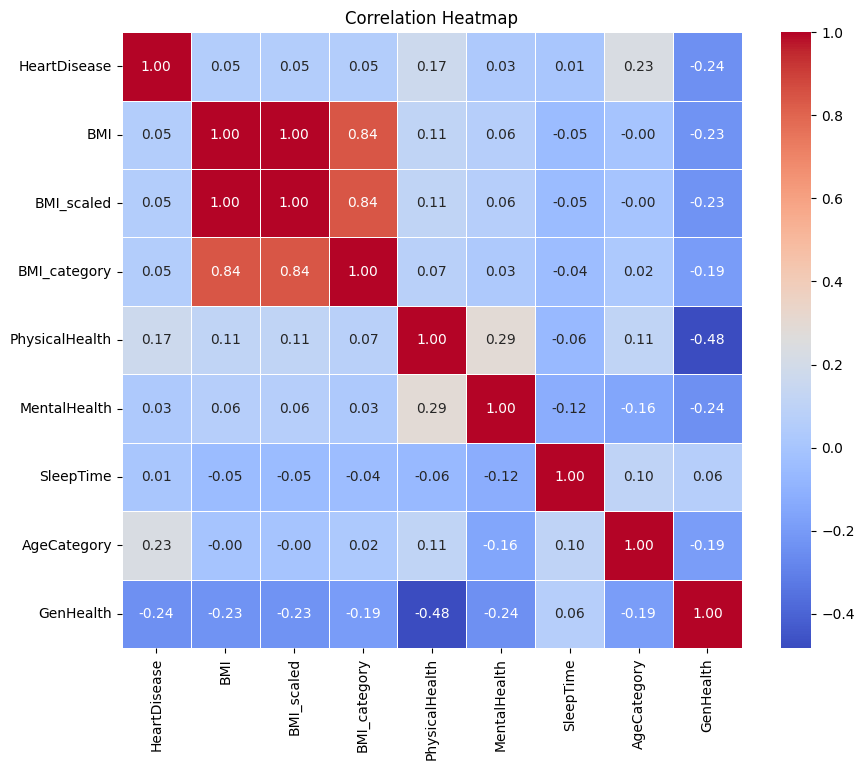

In [24]:
features = [
    'HeartDisease', 'BMI', 'BMI_scaled', 'BMI_category',
    'PhysicalHealth', 'MentalHealth', 'SleepTime',
    'AgeCategory', 'GenHealth'
]
correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
columns_to_view = ['PhysicalHealth', 'MentalHealth', 'PhysicalActivity', 'GenHealth']
df[columns_to_view].head()

,PhysicalHealth,MentalHealth,PhysicalActivity,GenHealth
0,3.0,30.0,True,4
1,0.0,0.0,True,4
2,20.0,30.0,True,2
3,0.0,0.0,False,3
4,28.0,0.0,True,4


In [26]:
df['SmokesAndDrinks'] = df['Smoking'] & df['AlcoholDrinking']
df['Active_GoodHealth'] = df['PhysicalActivity'] & (df['GenHealth'] >= 3)

In [27]:
df[['SmokesAndDrinks', 'Active_GoodHealth']].head()

,SmokesAndDrinks,Active_GoodHealth
0,False,True
1,False,True
2,False,False
3,False,False
4,False,True


In [28]:
chronic_conditions = ['Stroke', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HasDiabetes']
df['ChronicConditionCount'] = df[chronic_conditions].sum(axis=1)
df['ChronicConditionCount'] = df['ChronicConditionCount'].astype(int)

df['BMI_squared'] = df['BMI'] ** 2

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  bool   
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  bool   
 3   AlcoholDrinking                      319795 non-null  bool   
 4   Stroke                               319795 non-null  bool   
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  bool   
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  object 
 11  PhysicalActiv